# Task 1: [Where's Waldo?](https://www.wikihow.com/Find-Waldo) (50%)

## Fingerprinting
Browser fingerprinting is a technique used to identify and track individuals based on unique characteristics of their web browser configuration. These characteristics can include the browser type, version, installed plugins, and screen resolution, among others. By combining these attributes, websites can create a digital fingerprint that can be used to track user behavior across multiple sites, even if they clear their cookies or use different devices. This has raised concerns about privacy and the potential for this technology to be used for targeted advertising, surveillance, and other purposes.

[Read more about Fingerprinting](https://datadome.co/learning-center/browser-fingerprinting-techniques/)


## What You Need to Do
In this task, you are required to employ a fully connected feed-forward Artificial Neural Network (ANN) to tackle a classification problem. This involves several key steps, each critical to the development and performance of your model:

- **Exploratory Data Analysis (EDA) (10%)**: Begin by conducting a thorough exploratory analysis of the provided dataset. Your goal here is to uncover patterns, anomalies, relationships, or trends that could influence your modeling decisions. **Share the insights** you gather from this process and explain how they informed your subsequent steps.
  
- **Data Preprocessing and Feature Engineering (10%)**: Based on your EDA insights, choose and implement the most appropriate data preprocessing steps and feature engineering techniques. This may include handling missing values, encoding categorical variables, normalizing data, and creating new features that could enhance your model's ability to learn from the data.
  
- **Model Design and Training (10%)**: Design a fully connected feed-forward ANN model. You will need to experiment with different architectures, layer configurations, and hyperparameters to find the most effective solution for the classification problem at hand.

- **Feature Importance Analysis (10%)**: After developing your model, analyze which features are most important for making predictions. Discuss how this analysis aligns with your initial EDA insights and what it reveals about the characteristics most indicative of specific user behaviors or identities.

- **Evaluation (10%)**: You will be required to submit your model prediction on a hidden data set.

### Data
You will be using the data in `Task_1.json` to identify Waldo (`user_id=0`). The dataset includes:
- **"browser", "os" and "locale"**: Information about the software used.
- **"user_id"**: A unique identifier for each user.
- **"location"**: Geolocation based on the IP address used.
- **"sites"**: A list of visited URLs and the time spent there in seconds.
- **"time" and "date"**: When the session started in GMT.


### Evaluation
After training, evaluate your model by printing the classification report on your test set. Then, predict whether each user in `task_1_verify.json` is Waldo or not, by adding the boolean `is_waldo` property to the `task_1_verify.json`:

```diff
  [
    {
+     "is_waldo": false,
      "browser": "Chrome",
      "os": "Debian",
      "locale": "ur-PK",
      "location": "Russia/Moscow",
      "sites": [
          // ...
      ],
      "time": "04:12:00",
      "date":"2017-06-29"
    }
    // ...
  ]

```

## Learning Objectives

- **Exploratory Data Analysis**: Apply suitable analysis techniques to gain insights and better understand the dataset.
- **Classification Approach**: Identify the most appropriate method for the given problem.
- **Data Preprocessing**: Select and execute proper preprocessing and encoding techniques.
- **Model Implementation**: Utilize ANNs to address a classification problem, including training, validation, and testing phases.
- **Feature Importance Analysis**: Determine and report which features are most critical for the model's predictions to uncover insights into specific user behaviors.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_json("task_1_train_data.json")
verify = pd.read_json("task_1_verify.json")

In [3]:
data.head()

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23


In [4]:
verify.head()

,browser,os,locale,location,sites,time,date
0,Internet Explorer,Windows 8,xh-ZA,France/Paris,"[{'site': 'baidu.com', 'length': 201}, {'site'...",14:13:00,2016-11-05
1,Chrome,Windows 10,ja-JP,Germany/Berlin,"[{'site': 'toptal.com', 'length': 96}, {'site'...",21:06:00,2017-02-22
2,Chrome,Windows 10,it-IT,Singapore/Singapore,"[{'site': 'bing.net', 'length': 225}, {'site':...",13:17:00,2016-01-30
3,Chrome,Windows 10,ur-PK,UK/London,"[{'site': 'google.com', 'length': 113}, {'site...",17:00:00,2017-02-27
4,Firefox,Ubuntu,en-CA,Russia/Moscow,"[{'site': 'googleapis.com', 'length': 243}, {'...",18:11:00,2017-04-19


In [5]:
data.shape, verify.shape

((40000, 8), (40000, 7))

## Exploratory Data Analysis

#### Dataset's copy to analyze

First let's create a deep copy of data to be free of modifications while analysis

In [6]:
df = data.copy(deep=True)

In [7]:
df

,browser,os,locale,user_id,location,sites,time,date
0,Chrome,Debian,ur-PK,116,Russia/Moscow,"[{'site': 'bing.net', 'length': 52}, {'site': ...",04:12:00,2017-06-29
1,Firefox,Windows 8,uk-UA,155,France/Paris,"[{'site': 'yahoo.com', 'length': 46}, {'site':...",03:57:00,2016-03-23
2,Safari,MacOS,fr-FR,39,Japan/Tokyo,"[{'site': 'oracle.com', 'length': 335}]",05:26:00,2016-11-17
3,Chrome,Windows 8,nl-NL,175,Australia/Sydney,"[{'site': 'mail.google.com', 'length': 192}, {...",00:05:00,2016-08-23
4,Firefox,Ubuntu,ro-RO,50,USA/San Francisco,"[{'site': 'mail.google.com', 'length': 266}, {...",22:55:00,2016-07-23
...,...,...,...,...,...,...,...,...
39995,Chrome,Windows 10,wo-SN,184,Malaysia/Kuala Lumpur,"[{'site': 'airbnb.com', 'length': 96}, {'site'...",06:45:00,2016-04-03
39996,Chrome,Windows 10,ru_RU,181,France/Paris,"[{'site': 'lenta.ru', 'length': 84}, {'site': ...",20:57:00,2016-12-28
39997,Safari,MacOS,en-GB,112,Australia/Sydney,"[{'site': 'toptal.com', 'length': 65}, {'site'...",04:12:00,2016-07-26
39998,Safari,MacOS,pt-BR,136,India/Delhi,"[{'site': 'yworks.com', 'length': 146}, {'site...",10:18:00,2017-01-01


First things first, lets look at our waldos

In [8]:
df["is_waldo"] = np.where(df["user_id"] == 0, 1, 0)
df.drop(columns=["user_id"], inplace=True)

waldos = df[df["is_waldo"] == 1]
not_waldos = df[df["is_waldo"] == 0]

In [10]:
waldos

,browser,os,locale,location,sites,time,date,is_waldo
95,Firefox,Ubuntu,ru_RU,USA/Chicago,"[{'site': 'mail.google.com', 'length': 75}, {'...",02:47:00,2016-11-05,1
254,Firefox,Windows 10,ru_RU,France/Paris,"[{'site': 'lenta.ru', 'length': 43}, {'site': ...",20:52:00,2016-05-05,1
292,Chrome,Windows 10,ru_RU,USA/Chicago,"[{'site': 'vk.com', 'length': 79}, {'site': 'm...",03:38:00,2017-05-12,1
366,Chrome,Windows 10,ru_RU,France/Paris,"[{'site': 'mail.google.com', 'length': 71}, {'...",11:04:00,2016-05-19,1
435,Chrome,Windows 10,ru_RU,France/Paris,"[{'site': 'mail.google.com', 'length': 72}, {'...",20:22:00,2016-06-27,1
...,...,...,...,...,...,...,...,...
39073,Chrome,Ubuntu,ru_RU,USA/Chicago,"[{'site': 'youtube.com', 'length': 88}, {'site...",02:22:00,2017-03-24,1
39231,Chrome,Ubuntu,ru_RU,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 87}, {'...",02:51:00,2017-08-25,1
39450,Chrome,Ubuntu,ru_RU,USA/Chicago,"[{'site': 'mail.google.com', 'length': 93}, {'...",02:39:00,2016-12-02,1
39893,Firefox,Ubuntu,ru_RU,Canada/Toronto,"[{'site': 'mail.google.com', 'length': 49}, {'...",17:27:00,2017-09-04,1


#### Locale

**Inference**:

We can clearly see that waldo has only ru_RU locale. That's why we can drop all of the locales leaving the only feature "is_locale_ru_RU"

In [11]:
print(
    f"Waldos amount having locale equal to \"ru_RU\" {len(waldos[waldos['locale'] == 'ru_RU']) / len(waldos) * 100:.2f}%"
)
print(
    f"Percentage of waldos amount all locale \"ru_RU\" {len(waldos) / len(df[df['locale'] == 'ru_RU']) * 100:.2f}%"
)

Waldos amount having locale equal to "ru_RU" 100.00%
Percentage of waldos amount all locale "ru_RU" 11.11%


#### Browser

**Inference:**

There are no correlation between waldo and one exact browser but we can definetely see that waldo does not use Safari and Internet Explorer

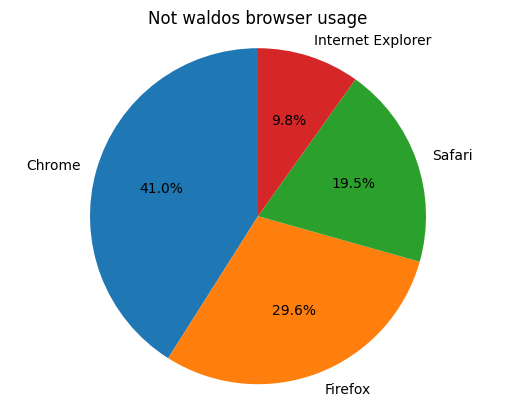

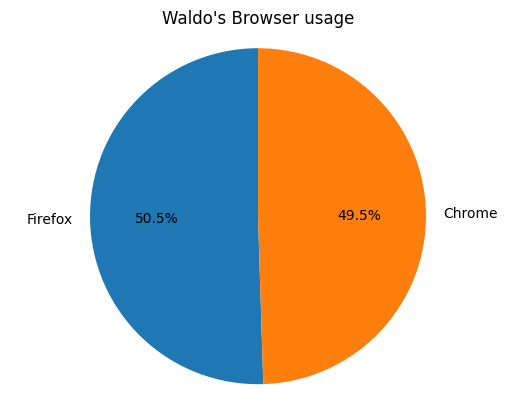

In [12]:
browser_counts = not_waldos["browser"].value_counts()
plt.pie(browser_counts, labels=browser_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Not waldos browser usage")
plt.show()

browser_counts = waldos["browser"].value_counts()
plt.pie(browser_counts, labels=browser_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Waldo's Browser usage")
plt.show()

#### OS

**Inference:**

The os field also does not provide a good separation but we definetely can see that is sample's os is ubuntu we are a bit more likely to find waldo. The windows 10 is almost useless because it is the major class


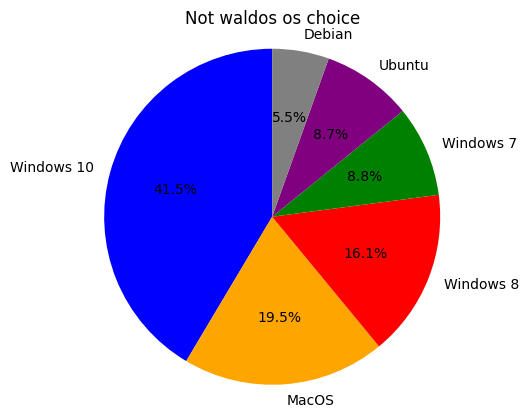

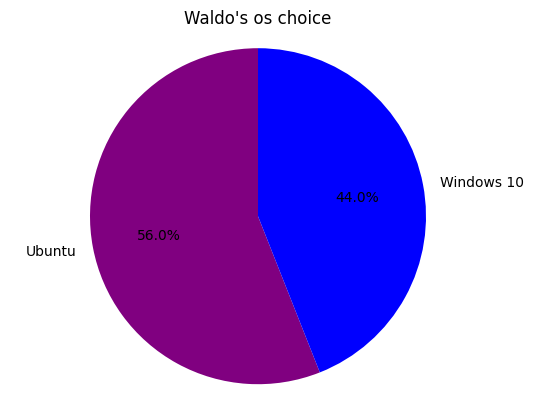

In [13]:
colors = ["blue", "orange", "red", "green", "purple", "gray"]

os_counts = not_waldos["os"].value_counts()
plt.pie(os_counts, labels=os_counts.index, colors=colors, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Not waldos os choice")
plt.show()

colors = ["purple", "blue"]
os_counts = waldos["os"].value_counts()
plt.pie(os_counts, labels=os_counts.index, colors=colors, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Waldo's os choice")
plt.show()

#### Location

**Inference:**

- Country

From plots we see that location is not a good indicator and three countries where waldo appears USA, France, Canada are almost the most wide spread.

- City

The waldo cities are not that wide spread among others. The decision is to encode only waldo's countries and cities pairs:

- USA/Chicago
- France/Paris
- Canada/Toronto

In [14]:
df[["country", "city"]] = df["location"].str.split("/", expand=True)

waldos = df[df["is_waldo"] == 1]
not_waldos = df[df["is_waldo"] == 0]

In [15]:
waldos_countries = waldos["country"].unique()
print(waldos_countries)

['USA' 'France' 'Canada']


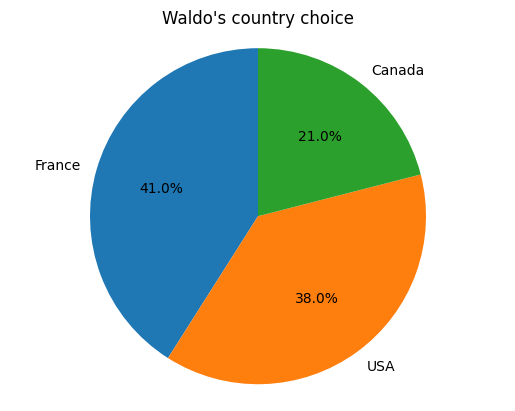

In [16]:
country_counts = waldos["country"].value_counts()

plt.pie(country_counts, labels=country_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Waldo's country choice")
plt.show()

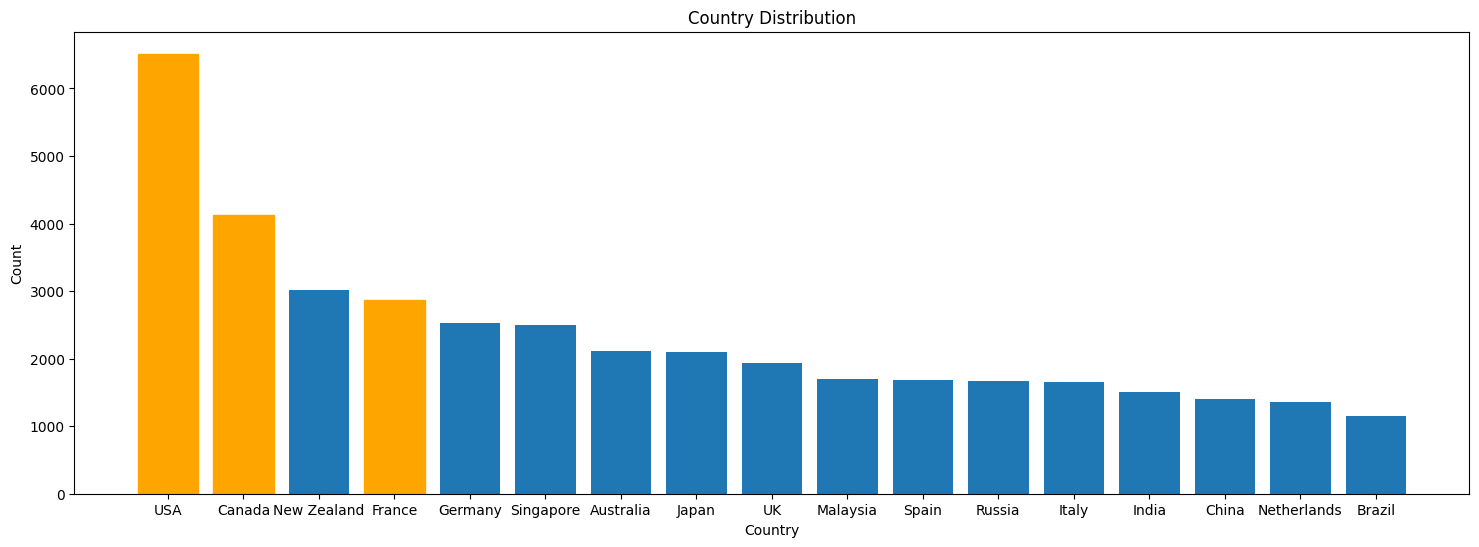

In [17]:
country_counts = not_waldos["country"].value_counts()

indexes = []
for i, c in enumerate(country_counts.index):
    if c in waldos_countries:
        indexes.append(i)

plt.figure(figsize=(18, 6))
bars = plt.bar(country_counts.index, country_counts)

for ind in indexes:
    bars[ind].set_color("orange")
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country Distribution")
plt.show()

In [18]:
waldos_cities = waldos["city"].unique()
print(waldos_cities)

['Chicago' 'Paris' 'Toronto']


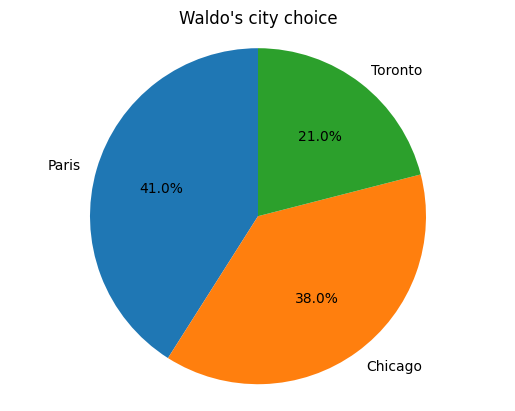

In [19]:
city_counts = waldos["city"].value_counts()

plt.pie(city_counts, labels=city_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Waldo's city choice")
plt.show()

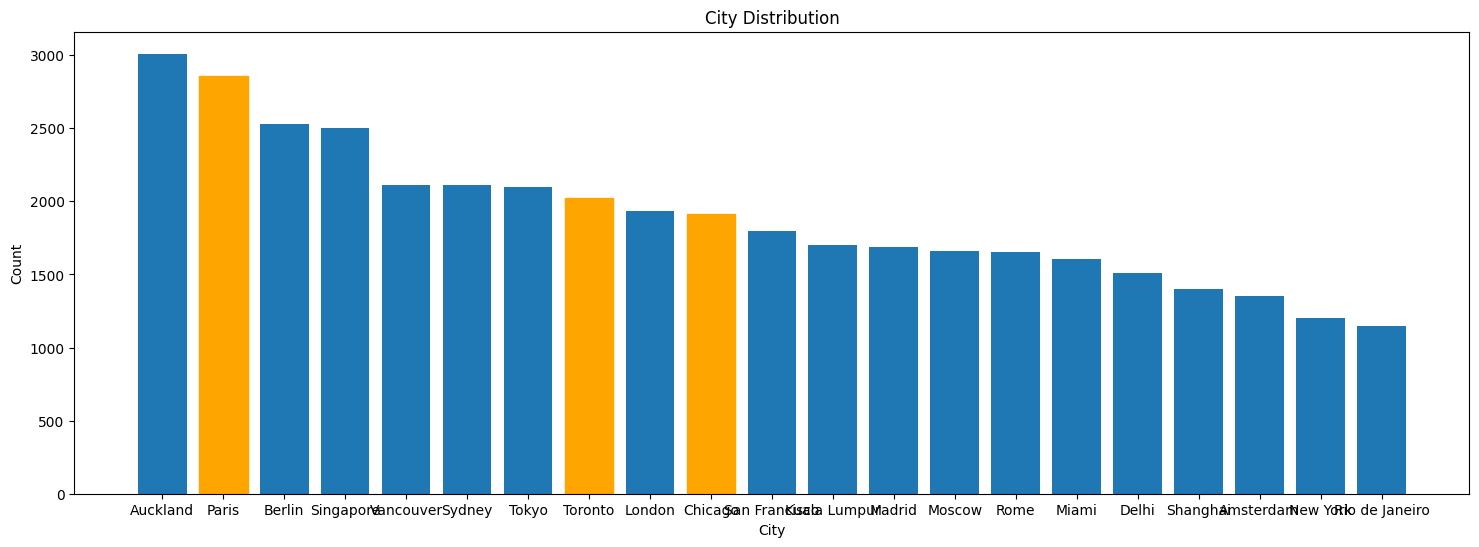

In [20]:
city_counts = not_waldos["city"].value_counts()

indexes = []
for i, c in enumerate(city_counts.index):
    if c in waldos_cities:
        indexes.append(i)

plt.figure(figsize=(18, 6))
bars = plt.bar(city_counts.index, city_counts)

for ind in indexes:
    bars[ind].set_color("orange")

plt.xlabel("City")
plt.ylabel("Count")
plt.title("City Distribution")
plt.show()

#### GMT Application

**Note:** Here is an assumption that waldo is not using WPN

**Note:** No calculation of summer time difference for some countries due to GMT.


In [21]:
df[["hour", "minute", "second"]] = df["time"].str.split(":", expand=True)
df[["country", "city"]] = df["location"].str.split("/", expand=True)
df.drop(columns=["second"], inplace=True)  # because all vales of seconds are 00

df["hour"] = df["hour"].astype(int)
df["minute"] = df["minute"].astype(int)

In [22]:
import pytz
from datetime import datetime
from geopy.geocoders import Nominatim
from timezonefinder import TimezoneFinder

# initialize geopy and timezonefinder
geolocator = Nominatim(user_agent="task1")
tz_finder = TimezoneFinder()


def get_gmt_timezone(city: str) -> str:
    # get the location of the city
    location = geolocator.geocode(city, exactly_one=True)
    if location is None:
        print(f"City {city} not found.")
        return ""

    # get the timezone of the city
    timezone_str: str = tz_finder.timezone_at(lng=location.longitude, lat=location.latitude)  # type: ignore
    return timezone_str


# get a dictionary of mapping city to its timezone
city_to_tz_map = dict()
for city in df["city"].unique():
    city_to_tz_map[city] = get_gmt_timezone(city)

In [23]:
city_to_tz_map

{'Moscow': 'Europe/Moscow',
 'Paris': 'Europe/Paris',
 'Tokyo': 'Asia/Tokyo',
 'Sydney': 'Australia/Sydney',
 'San Francisco': 'America/Los_Angeles',
 'Vancouver': 'America/Vancouver',
 'London': 'Europe/London',
 'Toronto': 'America/Toronto',
 'Kuala Lumpur': 'Asia/Kuala_Lumpur',
 'Miami': 'America/New_York',
 'Rome': 'Europe/Rome',
 'Madrid': 'Europe/Madrid',
 'Chicago': 'America/Chicago',
 'Berlin': 'Europe/Berlin',
 'Shanghai': 'Asia/Shanghai',
 'Delhi': 'Asia/Kolkata',
 'Rio de Janeiro': 'America/Sao_Paulo',
 'Singapore': 'Asia/Singapore',
 'Amsterdam': 'Europe/Amsterdam',
 'New York': 'America/New_York',
 'Auckland': 'Pacific/Auckland'}

Functions to finally get a GMT offset of location

In [24]:
def get_gmt_offset(tz_name: str) -> int:
    timezone = pytz.timezone(
        tz_name
    )  # create a timezone object from given timezone name
    # city_time = dt.astimezone()  # get the current date and time in the city's timezone
    city_time = datetime.now(tz=timezone)
    gmt_offset = int(city_time.utcoffset().total_seconds() / 3600)  # type: ignore
    return gmt_offset


def get_gmt_offset_from_location(location: str):
    city = location.split("/")[1]
    tz_name = city_to_tz_map[city]
    return get_gmt_offset(tz_name)

In [25]:
df["gmt_offset"] = df["location"].apply(
    lambda location: get_gmt_offset_from_location(location)
)

Apply offset to date and time of the objects

In [26]:
from datetime import timedelta


def get_offseted_datetime(row) -> datetime:
    dt: datetime = row["date"]
    dt += timedelta(hours=row["hour"], minutes=row["minute"])
    dt += timedelta(hours=row["gmt_offset"])
    return dt

In [27]:
df["new_dt"] = df.apply(get_offseted_datetime, axis=1)

Update dates and hours due to offseted time, minutes, seconds remain the same

In [28]:
df["date"] = df["new_dt"].apply(lambda dt: datetime(dt.year, dt.month, dt.day))
df["hour"] = df["new_dt"].apply(lambda dt: dt.hour)

In [29]:
df.drop(columns=["gmt_offset", "new_dt", "time"], inplace=True)

#### Time

**Inference:**

We can clearly see 2 hour ranges of waldo's activity:
- [12, 13]
- [21, 22]

Other users have almost normal distribution but they tend to serf oppositely to waldo

There are no correlations between minutes inside each ranges, so leave minutes as it is.

In [30]:
waldos = df[df["is_waldo"] == 1]  # type: ignore
not_waldos = df[df["is_waldo"] == 0]

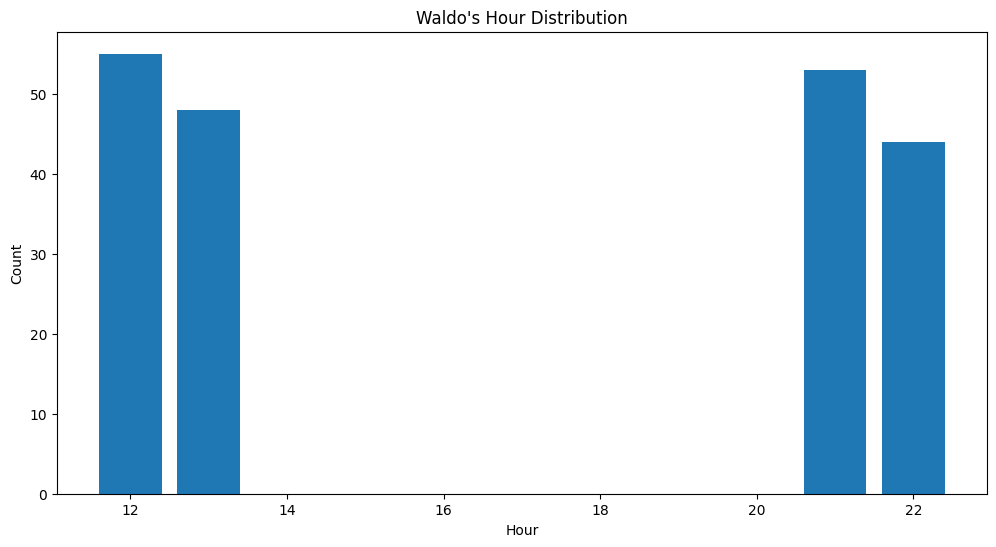

In [31]:
hour_counts = waldos["hour"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(hour_counts.index, hour_counts)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Waldo's Hour Distribution")
plt.show()

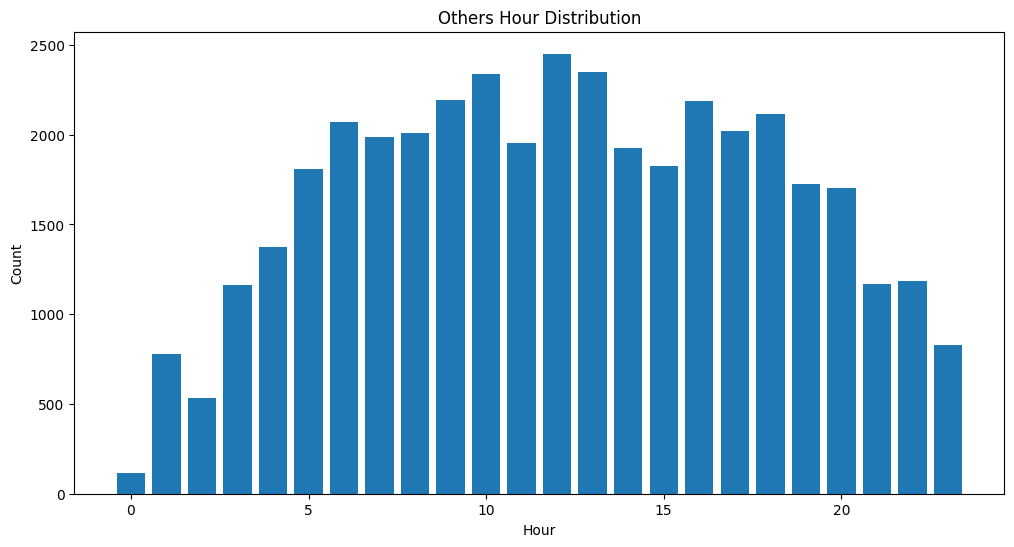

In [32]:
hour_counts = not_waldos["hour"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(hour_counts.index, hour_counts)

plt.xlabel("Hour")
plt.ylabel("Count")
plt.title("Others Hour Distribution")
plt.show()

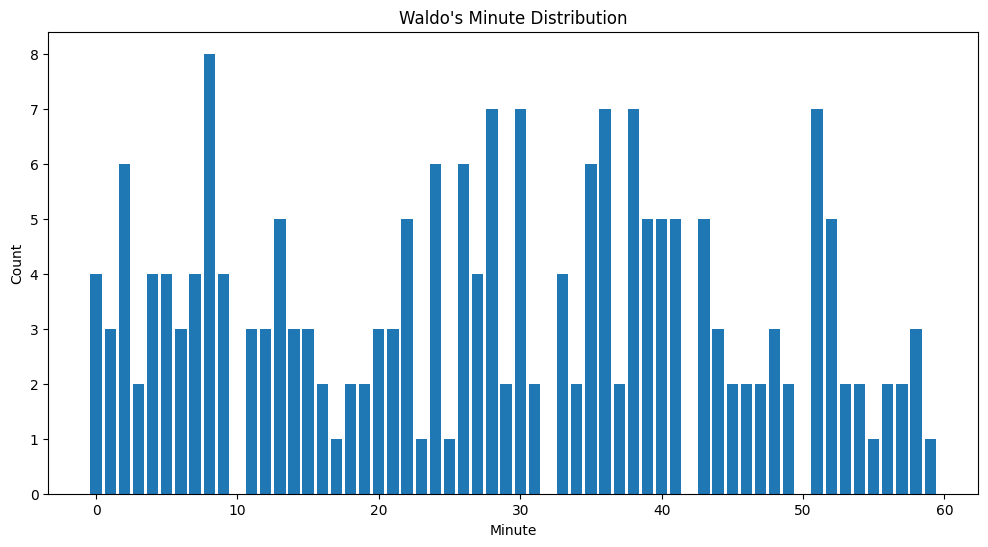

In [33]:
minute_counts = waldos["minute"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(minute_counts.index, minute_counts)

plt.xlabel("Minute")
plt.ylabel("Count")
plt.title("Waldo's Minute Distribution")
plt.show()

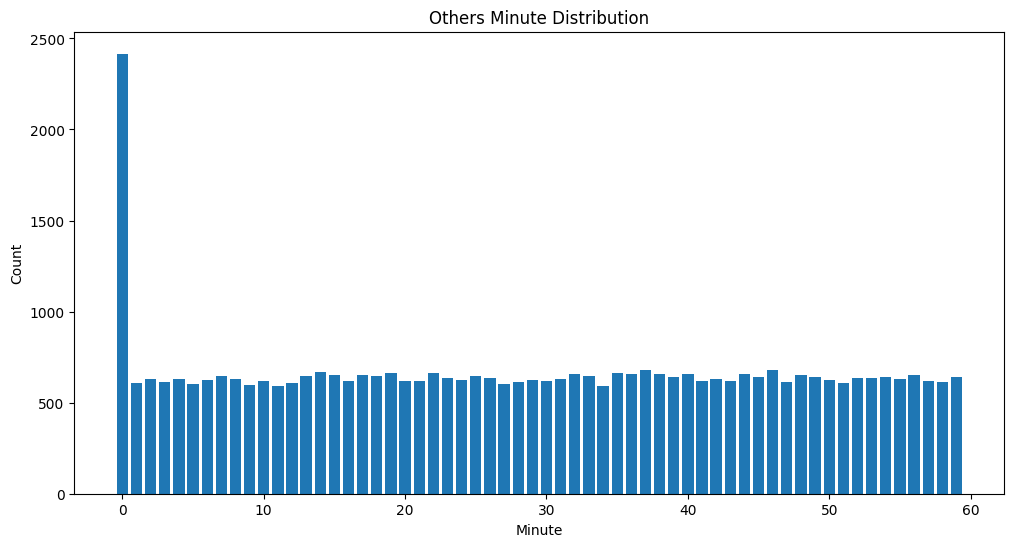

In [34]:
minute_counts = not_waldos["minute"].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(minute_counts.index, minute_counts)

plt.xlabel("Minute")
plt.ylabel("Count")
plt.title("Others Minute Distribution")
plt.show()

#### Date

**Inference:**

1. Day of week

From bar plots of days of week we see that no correlaions exist. There is slight dominance of friday but it is not enough.

2. Days

There no correlations. Others plot looks almost uniformly distributed, waldo's not but probably because of lack of data.

3. Month

Also, nothing can be said.

4. Years

Distributions look almost the same, so no information gain from year.


##### Day of week

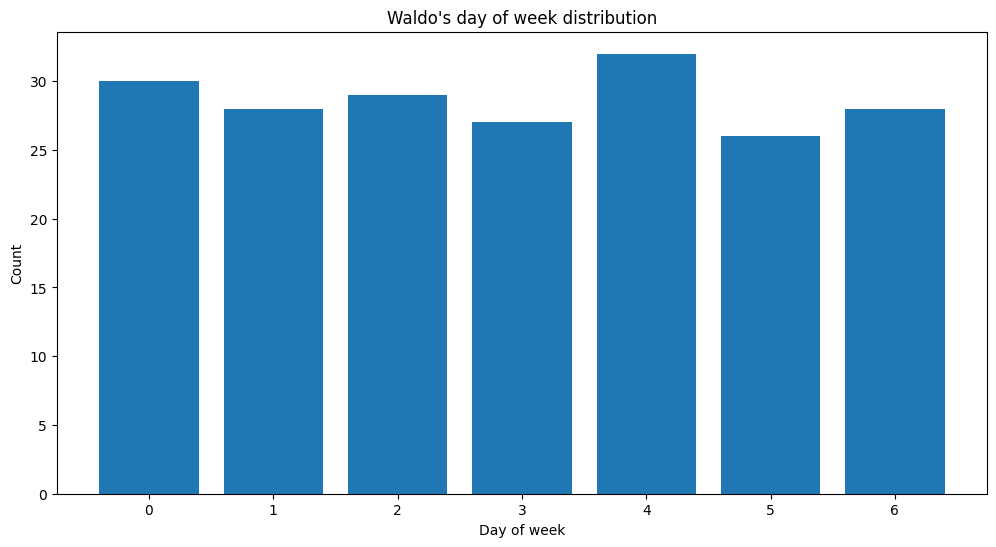

In [35]:
day_of_weeks = waldos["date"].apply(lambda date: date.weekday())

day_of_week_counts = day_of_weeks.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(day_of_week_counts.index, day_of_week_counts)

plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title("Waldo's day of week distribution")
plt.show()

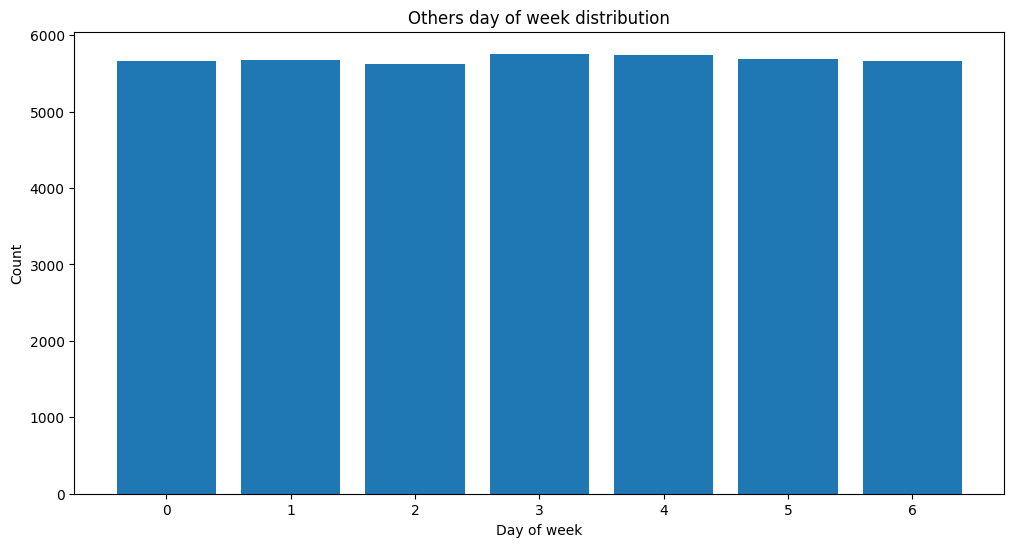

In [36]:
day_of_weeks = not_waldos["date"].apply(lambda date: date.weekday())

day_of_week_counts = day_of_weeks.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(day_of_week_counts.index, day_of_week_counts)

plt.xlabel("Day of week")
plt.ylabel("Count")
plt.title("Others day of week distribution")
plt.show()

##### Days

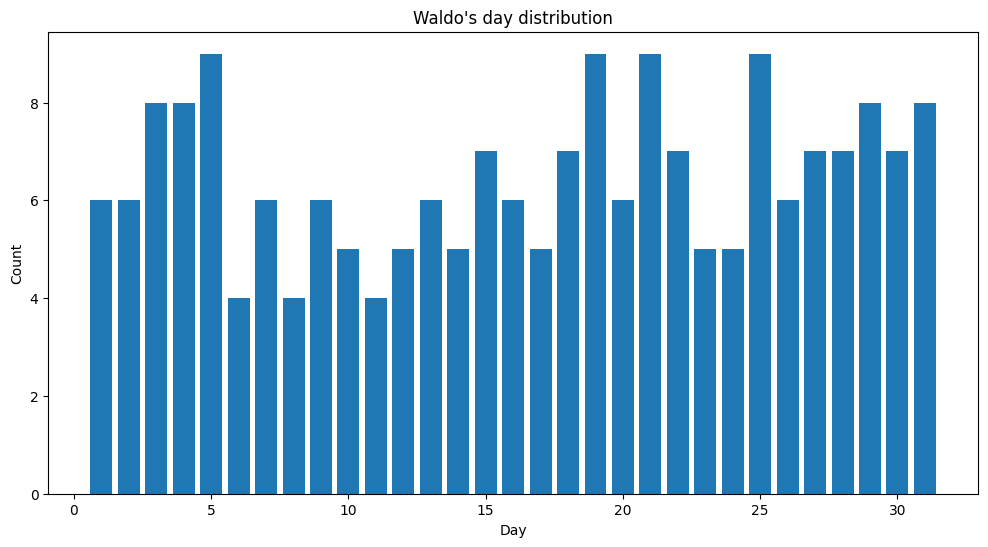

In [37]:
days = waldos["date"].apply(lambda date: date.day)

day_of_week_counts = days.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(day_of_week_counts.index, day_of_week_counts)

plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Waldo's day distribution")
plt.show()

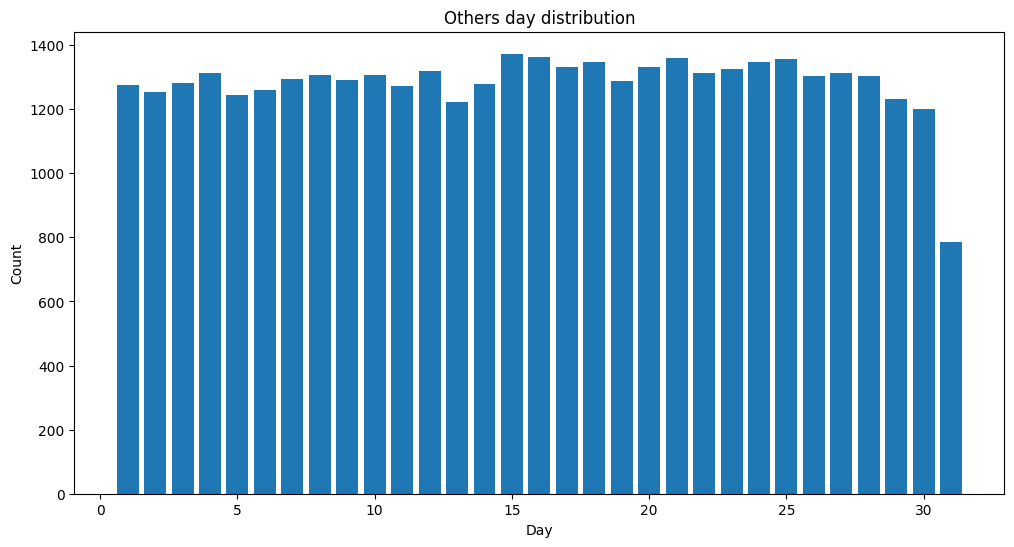

In [38]:
days = not_waldos["date"].apply(lambda date: date.day)

day_of_week_counts = days.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(day_of_week_counts.index, day_of_week_counts)

plt.xlabel("Day")
plt.ylabel("Count")
plt.title("Others day distribution")
plt.show()

##### Month

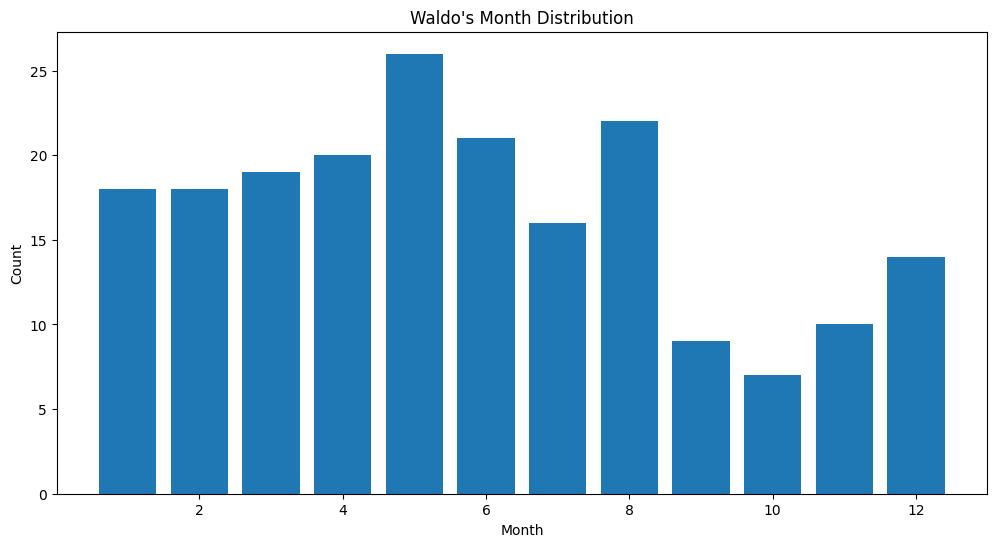

In [39]:
months = waldos["date"].apply(lambda date: date.month)

months_counts = months.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(months_counts.index, months_counts)

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Waldo's Month Distribution")
plt.show()

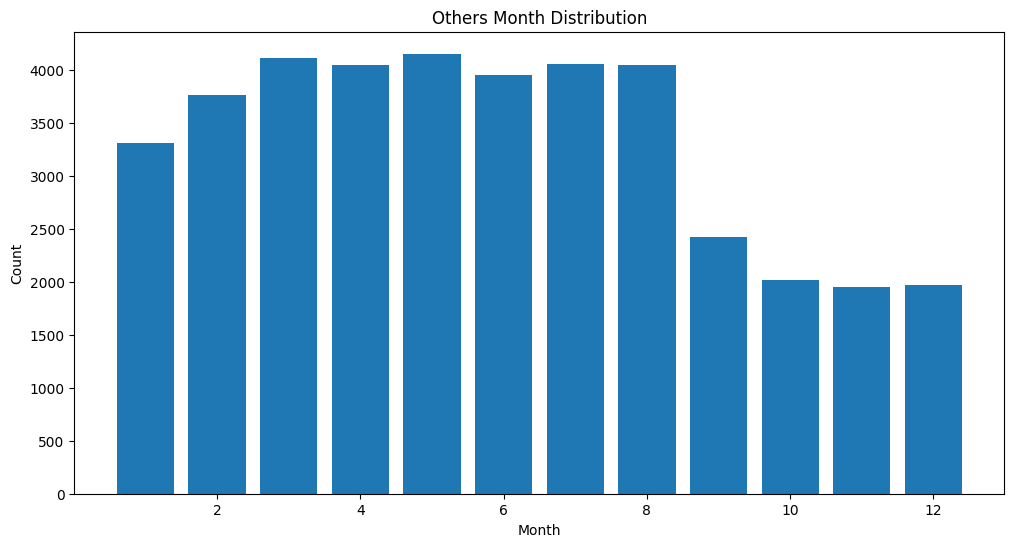

In [40]:
months = not_waldos["date"].apply(lambda date: date.month)

months_counts = months.value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(months_counts.index, months_counts)

plt.xlabel("Month")
plt.ylabel("Count")
plt.title("Others Month Distribution")
plt.show()

##### Year

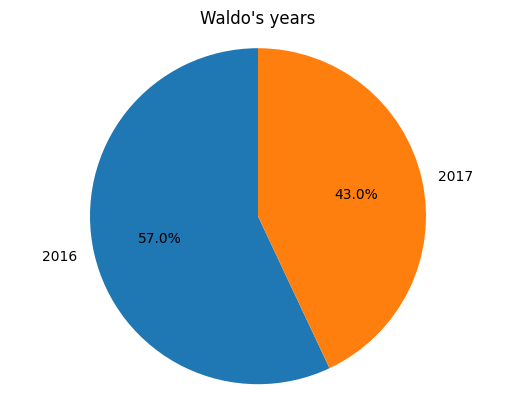

In [41]:
years = waldos["date"].apply(lambda date: date.year)

years_counts = years.value_counts()

plt.pie(years_counts, labels=years_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Waldo's years")
plt.show()

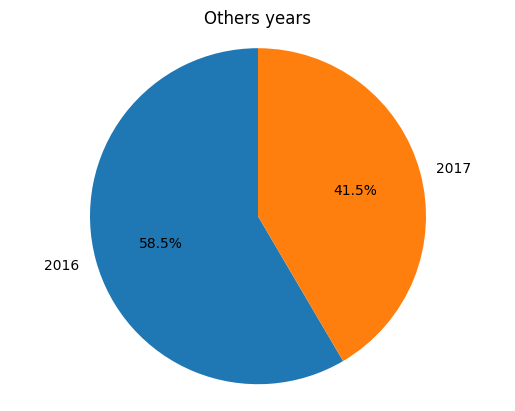

In [42]:
years = not_waldos["date"].apply(lambda date: date.year)

years_counts = years.value_counts()

plt.pie(years_counts, labels=years_counts.index, autopct="%1.1f%%", startangle=90)  # type: ignore
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Others years")
plt.show()

#### Sites

**Inference:**

It's important to keep the order of visited sites, so my approach is to take firsly simpe frequencies, then pairs, triplets and quadruplets. No more because 4 is approximately the average length of many sequncies that are presented by waldos.

In [43]:
sites = df["sites"].apply(lambda row: [d.get("site") for d in row]).to_list()
lengths = df["sites"].apply(lambda row: [d.get("length") for d in row]).to_list()

df["sites"] = sites
df["lengths"] = lengths

In [44]:
waldos = df[df["is_waldo"] == 1]
not_waldos = df[df["is_waldo"] == 0]

##### Site's frequency

In [45]:
TOP_K = 8

In [46]:
waldos_sites = dict()

for sites in waldos["sites"]:
    for site in sites:
        waldos_sites.update({site: waldos_sites.get(site, 0) + 1})

waldos_mostly_used_sites = sorted(
    waldos_sites, key=lambda k: waldos_sites[k], reverse=True
)
for s in waldos_mostly_used_sites[:TOP_K]:
    print(s, waldos_sites[s])

lenta.ru 182
toptal.com 179
vk.com 175
slack.com 173
mail.google.com 170
youtube.com 170
france-pari.fr 2
doctrine-project.org 2


In [47]:
not_waldos_sites = dict()

for sites in not_waldos["sites"]:
    for site in sites:
        not_waldos_sites.update({site: not_waldos_sites.get(site, 0) + 1})

not_waldos_mostly_used_sites = sorted(
    not_waldos_sites, key=lambda k: not_waldos_sites[k], reverse=True
)
for s in not_waldos_mostly_used_sites[:TOP_K]:
    print(s, not_waldos_sites[s])

youtube.com 14347
toptal.com 10764
slack.com 10585
lenta.ru 9073
vk.com 8569
mail.google.com 7815
oracle.com 5276
wikimedia.org 5231


In [48]:
sites_to_add = set(waldos_mostly_used_sites[:TOP_K]) - set(
    not_waldos_mostly_used_sites[:TOP_K]
)
sites_to_add  # no adding will be

{'doctrine-project.org', 'france-pari.fr'}

##### Sites pairs frequencies

In [49]:
TOP_K = 15

In [50]:
waldo_sites_pairs = dict()
for sites in waldos["sites"]:
    for i in range(len(sites) - 1):
        pair = sites[i] + " + " + sites[i + 1]
        waldo_sites_pairs.update({pair: waldo_sites_pairs.get(pair, 0) + 1})

waldo_most_used_sites_pairs = sorted(
    waldo_sites_pairs, key=lambda k: waldo_sites_pairs[k], reverse=True
)
for p in waldo_most_used_sites_pairs[:TOP_K]:
    print(p, waldo_sites_pairs[p])

mail.google.com + vk.com 126
toptal.com + lenta.ru 120
vk.com + toptal.com 118
lenta.ru + slack.com 72
slack.com + youtube.com 61
mail.google.com + toptal.com 30
vk.com + lenta.ru 26
toptal.com + slack.com 20
vk.com + mail.google.com 16
toptal.com + vk.com 16
lenta.ru + toptal.com 15
lenta.ru + youtube.com 12
slack.com + lenta.ru 11
youtube.com + toptal.com 6
lenta.ru + vk.com 5


In [51]:
not_waldo_sites_pairs = dict()
for sites in not_waldos["sites"]:
    for i in range(len(sites) - 1):
        pair = sites[i] + " + " + sites[i + 1]
        not_waldo_sites_pairs.update({pair: not_waldo_sites_pairs.get(pair, 0) + 1})

not_waldo_most_used_sites_pairs = sorted(
    not_waldo_sites_pairs, key=lambda k: not_waldo_sites_pairs[k], reverse=True
)
for p in not_waldo_most_used_sites_pairs[:TOP_K]:
    print(p, not_waldo_sites_pairs[p])

toptal.com + lenta.ru 1786
slack.com + lenta.ru 1414
mail.google.com + youtube.com 1345
lenta.ru + slack.com 1314
toptal.com + slack.com 1200
vk.com + mail.google.com 1087
lenta.ru + toptal.com 1070
slack.com + youtube.com 1062
vk.com + toptal.com 971
youtube.com + youtube.com 958
mail.google.com + toptal.com 925
mail.google.com + vk.com 889
youtube.com + vk.com 804
vk.com + youtube.com 803
slack.com + vk.com 738


Pairs to add as features

In [52]:
sites_pairs_to_add = set(waldo_most_used_sites_pairs[:TOP_K]) - set(
    not_waldo_most_used_sites_pairs[:TOP_K]
)
sites_pairs_to_add

{'lenta.ru + vk.com',
 'lenta.ru + youtube.com',
 'toptal.com + vk.com',
 'vk.com + lenta.ru',
 'youtube.com + toptal.com'}

##### Triplets of sites

In [53]:
TOP_K = 10

In [54]:
waldo_sites_triplets = dict()
for sites in waldos["sites"]:
    for i in range(len(sites) - 2):
        pair = sites[i] + " + " + sites[i + 1] + " + " + sites[i + 2]
        waldo_sites_triplets.update({pair: waldo_sites_triplets.get(pair, 0) + 1})

waldo_most_used_sites_tripltes = sorted(
    waldo_sites_triplets, key=lambda k: waldo_sites_triplets[k], reverse=True
)
for t in waldo_most_used_sites_tripltes[:TOP_K]:
    print(t, waldo_sites_triplets[t])

mail.google.com + vk.com + toptal.com 112
vk.com + toptal.com + lenta.ru 102
toptal.com + lenta.ru + slack.com 64
lenta.ru + slack.com + youtube.com 37
mail.google.com + toptal.com + lenta.ru 16
mail.google.com + vk.com + lenta.ru 14
vk.com + toptal.com + slack.com 14
vk.com + mail.google.com + toptal.com 12
mail.google.com + toptal.com + vk.com 12
toptal.com + vk.com + lenta.ru 12


In [55]:
not_waldo_sites_triplets = dict()
for sites in not_waldos["sites"]:
    for i in range(len(sites) - 2):
        pair = sites[i] + " + " + sites[i + 1] + " + " + sites[i + 2]
        not_waldo_sites_triplets.update(
            {pair: not_waldo_sites_triplets.get(pair, 0) + 1}
        )

not_waldo_most_used_sites_tripltes = sorted(
    not_waldo_sites_triplets, key=lambda k: not_waldo_sites_triplets[k], reverse=True
)
for t in not_waldo_most_used_sites_tripltes[:TOP_K]:
    print(t, not_waldo_sites_triplets[t])

toptal.com + lenta.ru + slack.com 570
lenta.ru + toptal.com + vk.com 410
toptal.com + vk.com + mail.google.com 371
mail.google.com + youtube.com + youtube.com 368
vk.com + toptal.com + lenta.ru 365
mail.google.com + vk.com + toptal.com 337
youtube.com + mail.google.com + youtube.com 313
toptal.com + lenta.ru + lenta.ru 303
lenta.ru + slack.com + lenta.ru 292
toptal.com + toptal.com + lenta.ru 276


In [56]:
sites_triplets_to_add = set(waldo_most_used_sites_tripltes[:TOP_K]) - set(
    not_waldo_most_used_sites_tripltes[:TOP_K]
)
sites_triplets_to_add

{'lenta.ru + slack.com + youtube.com',
 'mail.google.com + toptal.com + lenta.ru',
 'mail.google.com + toptal.com + vk.com',
 'mail.google.com + vk.com + lenta.ru',
 'toptal.com + vk.com + lenta.ru',
 'vk.com + mail.google.com + toptal.com',
 'vk.com + toptal.com + slack.com'}

##### Lastly quadruplets

In [57]:
TOP_K = 10

In [58]:
waldo_sites_quadruplets = dict()
for sites in waldos["sites"]:
    for i in range(len(sites) - 3):
        pair = (
            sites[i]
            + " + "
            + sites[i + 1]
            + " + "
            + sites[i + 2]
            + " + "
            + sites[i + 3]
        )
        waldo_sites_quadruplets.update({pair: waldo_sites_quadruplets.get(pair, 0) + 1})

waldo_most_used_sites_quadruplets = sorted(
    waldo_sites_quadruplets, key=lambda k: waldo_sites_quadruplets[k], reverse=True
)
for q in waldo_most_used_sites_quadruplets[:TOP_K]:
    print(q, waldo_sites_quadruplets[q])

mail.google.com + vk.com + toptal.com + lenta.ru 98
vk.com + toptal.com + lenta.ru + slack.com 52
toptal.com + lenta.ru + slack.com + youtube.com 35
mail.google.com + vk.com + toptal.com + slack.com 14
mail.google.com + toptal.com + vk.com + lenta.ru 12
vk.com + mail.google.com + toptal.com + lenta.ru 11
mail.google.com + toptal.com + lenta.ru + slack.com 11
mail.google.com + vk.com + lenta.ru + toptal.com 10
vk.com + toptal.com + slack.com + lenta.ru 6
toptal.com + slack.com + lenta.ru + youtube.com 5


In [59]:
not_waldo_sites_quadruplets = dict()
for sites in not_waldos["sites"]:
    for i in range(len(sites) - 3):
        pair = (
            sites[i]
            + " + "
            + sites[i + 1]
            + " + "
            + sites[i + 2]
            + " + "
            + sites[i + 3]
        )
        not_waldo_sites_quadruplets.update(
            {pair: not_waldo_sites_quadruplets.get(pair, 0) + 1}
        )

not_waldo_most_used_sites_quadruplets = sorted(
    not_waldo_sites_quadruplets,
    key=lambda k: not_waldo_sites_quadruplets[k],
    reverse=True,
)
for q in not_waldo_most_used_sites_quadruplets[:TOP_K]:
    print(q, not_waldo_sites_quadruplets[q])

lenta.ru + toptal.com + vk.com + mail.google.com 337
mail.google.com + vk.com + toptal.com + lenta.ru 279
toptal.com + lenta.ru + slack.com + lenta.ru 182
toptal.com + toptal.com + lenta.ru + lenta.ru 149
vk.com + toptal.com + lenta.ru + slack.com 133
toptal.com + vk.com + mail.google.com + youtube.com 130
toptal.com + toptal.com + slack.com + slack.com 127
lenta.ru + lenta.ru + vk.com + lenta.ru 126
yahoo.com + yahoo.com + yahoo.com + ytimg.com 124
mail.google.com + toptal.com + lenta.ru + slack.com 116


In [60]:
sites_quadruplets_to_add = set(waldo_most_used_sites_quadruplets[:TOP_K]) - set(
    not_waldo_most_used_sites_quadruplets[:TOP_K]
)
sites_quadruplets_to_add

{'mail.google.com + toptal.com + vk.com + lenta.ru',
 'mail.google.com + vk.com + lenta.ru + toptal.com',
 'mail.google.com + vk.com + toptal.com + slack.com',
 'toptal.com + lenta.ru + slack.com + youtube.com',
 'toptal.com + slack.com + lenta.ru + youtube.com',
 'vk.com + mail.google.com + toptal.com + lenta.ru',
 'vk.com + toptal.com + slack.com + lenta.ru'}

In [61]:
def is_pattern_in_sites(pattern: str, sites: list[str]):
    joined_sites = " + ".join(sites)
    if pattern in joined_sites:
        return 1
    return 0

In [63]:
del df

## Data Preprocessing and Feature Engineering

In [64]:
def transforms(df: pd.DataFrame, with_labels: bool = False) -> pd.DataFrame:
    if with_labels:
        # create feature "is_waldo" based on user_id and drop user_id column since it's useless
        df["is_waldo"] = np.where(df["user_id"] == 0, 1, 0)
        df.drop(columns=["user_id"], inplace=True)

    # for samples with ru_RU chance of being waldo is increased
    df["is_locale_ru_RU"] = np.where(df["locale"] == "ru_RU", 1, 0)
    df.drop(columns=["locale"], inplace=True)

    # the only 2 browsers that waldo uses
    df["is_browser_Chrome"] = np.where(df["browser"] == "Chrome", 1, 0)
    df["is_browser_Firefox"] = np.where(df["browser"] == "Firefox", 1, 0)
    df.drop(columns=["browser"], inplace=True)

    # encode only the browsers that waldo uses
    df["is_os_Ubuntu"] = np.where(df["os"] == "Ubuntu", 1, 0)
    df["is_os_Windows_10"] = np.where(df["os"] == "Windows 10", 1, 0)
    df.drop(columns=["os"], inplace=True)

    # instead of one hot encode all countries and cities indicate only waldo's locations
    df["is_USA/Chicago"] = np.where(df["location"] == "USA/Chicago", 1, 0)
    df["is_France/Paris"] = np.where(df["location"] == "France/Paris", 1, 0)
    df["is_Canada/Toronto"] = np.where(df["location"] == "Canada/Toronto", 1, 0)
    # don't drop location because we will need it to calculate GMT

    #######
    # GMT #
    #######
    # consider GMT
    df[["hour", "minute", "second"]] = df["time"].str.split(":", expand=True)
    df.drop(columns=["second"], inplace=True)  # because all vales of seconds are 00

    # convert hours and minutes to integers
    df["hour"] = df["hour"].astype(int)
    df["minute"] = df["minute"].astype(int)

    # get offset
    df["gmt_offset"] = df["location"].apply(
        lambda location: get_gmt_offset_from_location(location)
    )

    # get new datetime after offset consideration
    df["new_dt"] = df.apply(get_offseted_datetime, axis=1)

    # update date and hour accordingly
    df["date"] = df["new_dt"].apply(lambda dt: datetime(dt.year, dt.month, dt.day))
    df["hour"] = df["new_dt"].apply(lambda dt: dt.hour)

    # drop useless columns after GMT
    df.drop(columns=["gmt_offset", "new_dt", "time", "location"], inplace=True)

    # create 3 columns responsible for ranges of waldo's activity
    df["is_in_from_12_to_13_hour"] = np.where(
        (df["hour"] >= 12) & (df["hour"] <= 13), 1, 0
    )
    df["is_in_from_21_to_22_hour"] = np.where(
        (df["hour"] >= 21) & (df["hour"] <= 22), 1, 0
    )
    df.drop(columns=["hour"], inplace=True)

    # create a feature representing day of week on the given date
    df["day_of_week"] = df["date"].apply(lambda date: date.weekday())

    # separate date on year, month and day
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["day"] = df["date"].dt.day
    df.drop(columns=["date"], inplace=True)

    #########
    # SITES #
    #########
    sites = df["sites"].apply(lambda row: [d.get("site") for d in row]).to_list()
    lengths = df["sites"].apply(lambda row: [d.get("length") for d in row]).to_list()

    df["sites"] = sites
    df["lengths"] = lengths

    # add pairs
    for pattern in sites_pairs_to_add:
        df[f"has_{pattern}"] = df["sites"].apply(
            lambda sites: is_pattern_in_sites(pattern, sites)
        )

    # add triplets
    for pattern in sites_triplets_to_add:
        df[f"has_{pattern}"] = df["sites"].apply(
            lambda sites: is_pattern_in_sites(pattern, sites)
        )

    # add quadriplets
    for pattern in sites_quadruplets_to_add:
        df[f"has_{pattern}"] = df["sites"].apply(
            lambda sites: is_pattern_in_sites(pattern, sites)
        )

    # just to use lengths
    data_lengths = df["lengths"].apply(lambda x: pd.Series(x)).add_prefix("length")
    data_lengths = data_lengths.fillna(0)
    df = pd.concat([df, data_lengths], axis=1)
    df.drop(columns=["sites", "lengths"], inplace=True)

    return df

In [65]:
data = transforms(df=data, with_labels=True)
X_verify = transforms(df=verify, with_labels=False)

## Model Design and Training

#### Divide on train and test

In [66]:
X = data.drop(columns="is_waldo")
y = data["is_waldo"]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

#### Scale data only after splitting and fit only on train

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_verify_scaled = scaler.transform(X_verify)

### Model Implementation

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.optimizers import Adam
from keras.losses import MeanSquaredError

In [70]:
y_train = y_train.astype("float32")

#### Hyperparameters

In [71]:
EPOCHS = 40
BATCH_SIZE = 128

In [72]:
input_shape = (X_train_scaled.shape[1],)

model = Sequential(
    [
        InputLayer(input_shape, batch_size=BATCH_SIZE),
        Dense(64, activation="relu"),
        Dropout(0.5),
        Dense(32, activation="relu"),
        Dropout(0.3),
        Dense(16, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)
model.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(),
    metrics=["accuracy", "Precision", "Recall", "F1Score"],
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (128, 64)                 3072      
                                                                 
 dropout (Dropout)           (128, 64)                 0         
                                                                 
 dense_1 (Dense)             (128, 32)                 2080      
                                                                 
 dropout_1 (Dropout)         (128, 32)                 0         
                                                                 
 dense_2 (Dense)             (128, 16)                 528       
                                                                 
 dense_3 (Dense)             (128, 1)                  17        
                                                                 
Total params: 5697 (22.25 KB)
Trainable params: 5697 (22

#### Calculate weights of disbalanced classes

In [73]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights


class_weights = calculate_class_weights(y)
print("Class weights:", class_weights)

Class weights: {0: 0.5025125628140703, 1: 100.0}


#### Fitting process

In [74]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.15,
    class_weight=class_weights,
)

Epoch 1/40
213/213 [==============================] - 2s 5ms/step - loss: 0.2161 - accuracy: 0.8181 - precision: 0.0165 - recall: 0.5942 - f1_score: 0.0101 - val_loss: 0.0900 - val_accuracy: 0.9454 - val_precision: 0.0775 - val_recall: 1.0000 - val_f1_score: 0.0091
Epoch 2/40
213/213 [==============================] - 1s 4ms/step - loss: 0.0823 - accuracy: 0.9018 - precision: 0.0459 - recall: 0.9275 - f1_score: 0.0101 - val_loss: 0.0334 - val_accuracy: 0.9623 - val_precision: 0.1045 - val_recall: 0.9545 - val_f1_score: 0.0091
Epoch 3/40
213/213 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9478 - precision: 0.0859 - recall: 0.9638 - f1_score: 0.0101 - val_loss: 0.0316 - val_accuracy: 0.9638 - val_precision: 0.1082 - val_recall: 0.9545 - val_f1_score: 0.0091
Epoch 4/40
213/213 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9521 - precision: 0.0941 - recall: 0.9783 - f1_score: 0.0101 - val_loss: 0.0317 - val_accuracy: 0.9635 - va

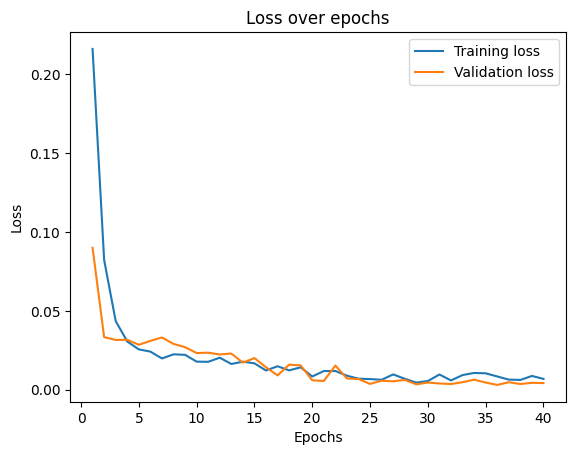

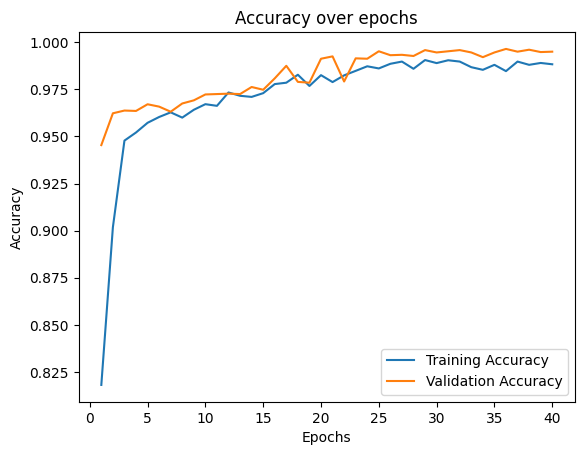

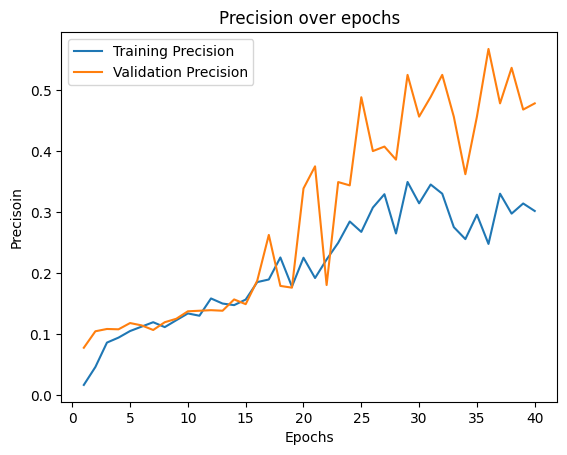

In [75]:
# losses
loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]

plt.plot(range(1, len(loss_history) + 1), loss_history, label="Training loss")
plt.plot(range(1, len(val_loss_history) + 1), val_loss_history, label="Validation loss")
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# accuracies
accuracy_history = history.history["accuracy"]
val_accuracy_history = history.history["val_accuracy"]

plt.plot(
    range(1, len(accuracy_history) + 1), accuracy_history, label="Training Accuracy"
)
plt.plot(
    range(1, len(val_accuracy_history) + 1),
    val_accuracy_history,
    label="Validation Accuracy",
)
plt.title("Accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# f1
precision_history = history.history["precision"]
val_precision_history = history.history["val_precision"]

plt.plot(
    range(1, len(precision_history) + 1), precision_history, label="Training Precision"
)
plt.plot(
    range(1, len(val_precision_history) + 1),
    val_precision_history,
    label="Validation Precision",
)
plt.title("Precision over epochs")
plt.xlabel("Epochs")
plt.ylabel("Precisoin")
plt.legend()

# Display the plot
plt.show()

## Feature Importance Analysis

**Inference:**

As it was analyzed, many important features are truly represented on plots.

We can clearly see presence of:
- is_locale_ru_RU being the most important feature
- is_in_from_21_to_22_hour and other being also very important as we saw on hour distribution plot
- year is supriprisingly considered as high influenced feature (probably some hidden dependencies)
- browser and os usage also are in the first 10 as it was expected

In [126]:
# this article helped a lot
# https://habr.com/ru/companies/wunderfund/articles/739744/
import shap

background = X_train_scaled[
    np.random.choice(X_train_scaled.shape[0], 100, replace=False)
]


explainer = shap.Explainer(model, background, feature_names=X_train.columns)
shap_values = explainer(X_test_scaled)

PermutationExplainer explainer: 8001it [08:15, 15.90it/s]                          


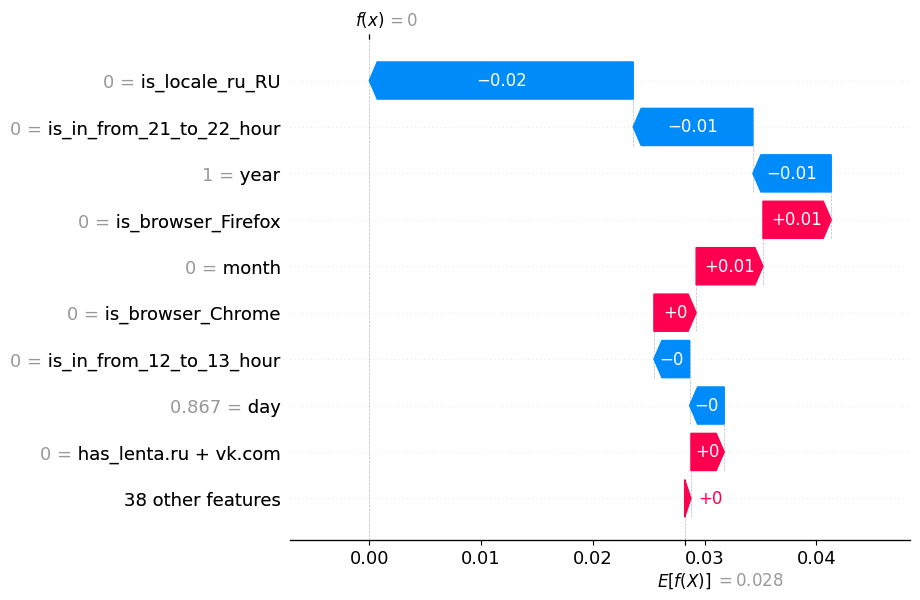

In [127]:
shap.plots.waterfall(shap_values[0])

In [128]:
shap.initjs()
shap.plots.force(shap_values[42])

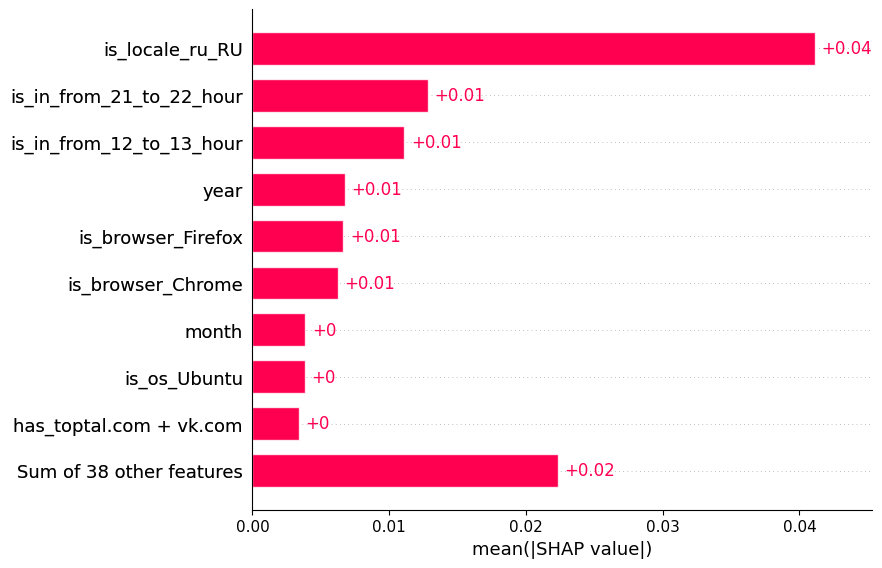

In [129]:
shap.plots.bar(shap_values)

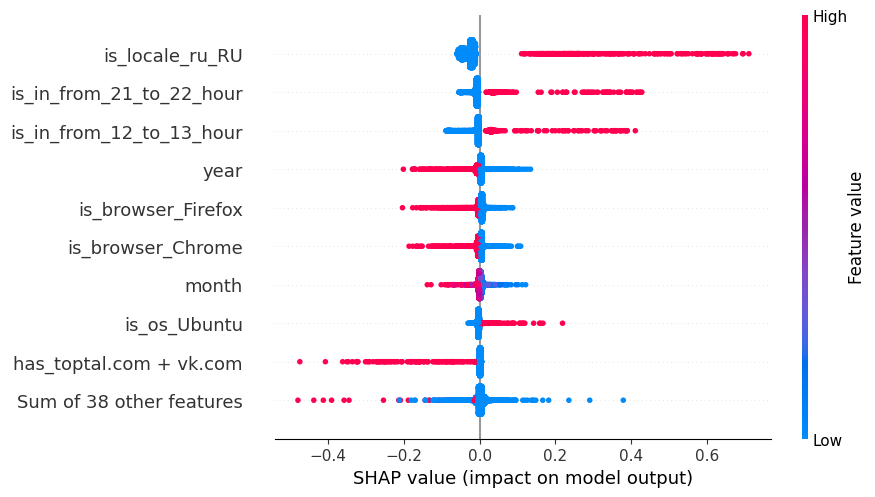

In [130]:
shap.plots.beeswarm(shap_values)

## Evaluation

- Threshold is chosed by 0.9
- Keeping recall >= 0.9 it is not that bad results of predictions

In [147]:
from sklearn.metrics import classification_report

threshold = 0.9
test_pred = model.predict(X_test_scaled)

y_pred = np.where(test_pred >= threshold, 1, 0)
print(classification_report(y_test, y_pred))

250/250 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7960
           1       0.53      0.90      0.67        40

    accuracy                           1.00      8000
   macro avg       0.76      0.95      0.83      8000
weighted avg       1.00      1.00      1.00      8000



In [148]:
print(f"Real number of waldos in test: {sum(y_test)}")
print(f"Pred number of waldos in test: {sum(y_pred).item()}")  # type: ignore

Real number of waldos in test: 40
Pred number of waldos in test: 68


In [149]:
verify_pred = model.predict(X_verify_scaled)
y_pred = np.where(verify_pred >= threshold, 1, 0)

1250/1250 [==============================] - 2s 1ms/step


In [153]:
print("Real number of waldos in verify: (200 approx) unknown")
print(f"Pred number of waldos in verify: {sum(y_pred).item()}")  # type: ignore

Real number of waldos in verify: (200 approx) unknown
Pred number of waldos in verify: 341


#### Fill the verify.json

In [165]:
import json

with open("task_1_verify.json", "r") as verify_json:
    users = json.load(verify_json)

In [166]:
len(users), len(y_pred)

(40000, 40000)

In [167]:
print(users[0].get("is_waldo"))

None


In [168]:
for i in range(len(users)):
    if y_pred[i]:
        users[i]["is_waldo"] = True
    else:
        users[i]["is_waldo"] = False

In [169]:
print(users[0].get("is_waldo"))

False


Write all predictions to verify.json

In [170]:
with open("verify.json", "w") as f:
    json.dump(users, f)

Check who are we predicted as waldo (first occurance)

In [171]:
with open("verify.json", "r") as f:
    users = json.load(f)

for user in users:
    if user["is_waldo"]:
        print(json.dumps(user, indent=4))
        break

{
    "browser": "Firefox",
    "os": "Windows 10",
    "locale": "ru_RU",
    "location": "France/Paris",
    "sites": [
        {
            "site": "mail.google.com",
            "length": 153
        },
        {
            "site": "vk.com",
            "length": 213
        },
        {
            "site": "lenta.ru",
            "length": 495
        },
        {
            "site": "toptal.com",
            "length": 156
        },
        {
            "site": "slack.com",
            "length": 464
        },
        {
            "site": "youtube.com",
            "length": 42
        }
    ],
    "time": "19:08:00",
    "date": "2016-03-31",
    "is_waldo": true
}
